<a href="https://colab.research.google.com/github/hasune613/hello/blob/main/Digit_Recognizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install gradio -q

In [34]:
%tensorflow_version 2.x
import tensorflow as tf
import gradio as gr

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.8.2


In [35]:
tf.get_logger().setLevel('ERROR')

In [36]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

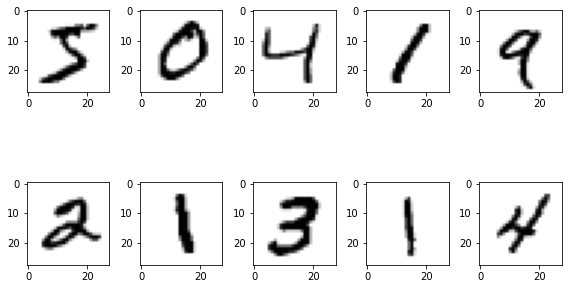

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (8,8),tight_layout = True)

n = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(x_train[n],cmap=plt.cm.binary)
        n += 1

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),

])


In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x_train,y_train,epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2627 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1161 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0803 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9851


In [42]:
_, test_acc = model.evaluate(x_test,y_test,verbose=2)
print(test_acc)


313/313 - 1s - loss: 0.0738 - accuracy: 0.9779 - 567ms/epoch - 2ms/step
0.9779000282287598


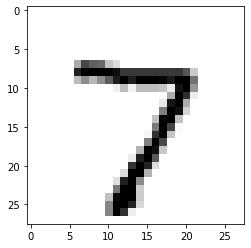

In [43]:
plt.imshow(x_test[0],cmap = plt.cm.binary)

In [51]:
predict = model.predict(x_test)

In [52]:
import numpy as np

np.argmax(predict[0])


7

## Gradioで画像認識アプリにする

In [55]:
def recognize_digit(img):
    img = img.reshape(1,28,28)
    prediction = model.predict(img).tolist()[0]
    return {str(i) : prediction[i] for i in range(10)}
label = gr.outputs.Label(num_top_classes= 4)
interface = gr.Interface(
    fn=recognize_digit,
    inputs='sketchpad',
    outputs=label,
    live=False,
    title = 'Digit Recognizer')

/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [56]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://10950.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f5630d47ed0>,
 'http://127.0.0.1:7862/',
 'https://10950.gradio.app')